In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10} 

In [3]:
students=pd.read_csv('../Performance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
students.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']

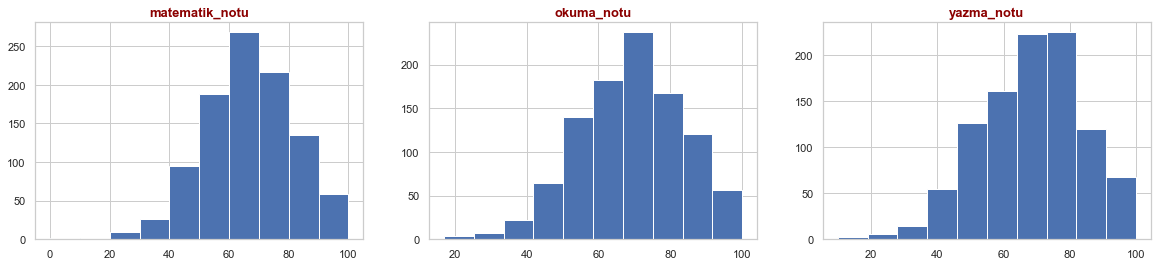

In [6]:
plt.figure(figsize=(20,4))
degiskenler=['matematik_notu', 'okuma_notu', 'yazma_notu']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.hist(students[degiskenler[i]])
    plt.title(degiskenler[i],fontdict=baslik_font)

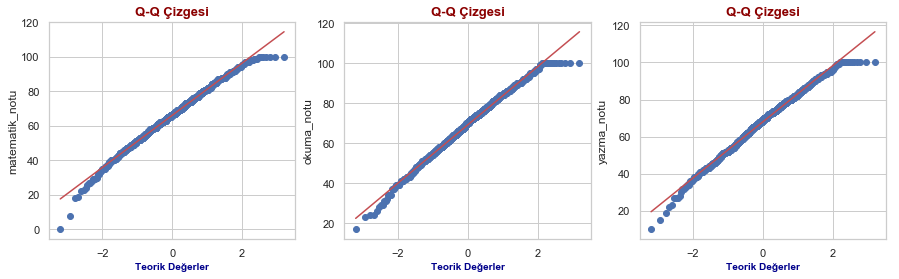

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
res=stats.probplot(students['matematik_notu'],plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel('matematik_notu')

plt.subplot(1,3,2)
res=stats.probplot(students['okuma_notu'],plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel('okuma_notu')

plt.subplot(1,3,3)
res=stats.probplot(students['yazma_notu'],plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel('yazma_notu')
plt.show()

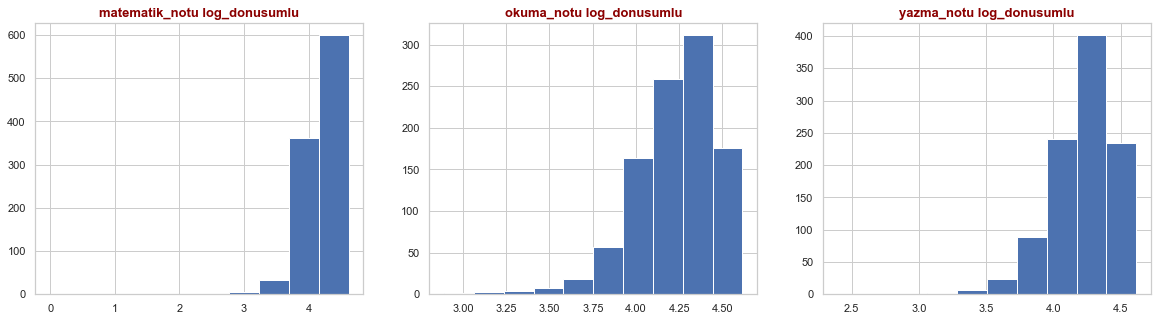

In [10]:
plt.figure(figsize=(20,5))
dersler = ['matematik_notu', 'okuma_notu', 'yazma_notu']
for i, ders in enumerate(dersler):
    plt.subplot(1,3,i+1)
    plt.hist(np.log(students[ders]+1))
    plt.title(ders+' log_donusumlu',fontdict=baslik_font)

In [82]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [32]:
pd.options.display.float_format = '{:.5f}'.format
dagilim_testleri = pd.DataFrame(columns=['ders', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
for ders in dersler:
    jb_stats=jarque_bera(np.log(students[ders]+1))
    norm_stats=normaltest(np.log(students[ders]+1))
    dagilim_testleri = dagilim_testleri.append({"ders": ders,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ders,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,matematik_notu,100224.83407,0.00000,964.72494,0.00000
1,okuma_notu,460.62976,0.00000,202.35115,0.00000
2,yazma_notu,1233.93927,0.00000,303.16712,0.00000


In [23]:
from sklearn.preprocessing import normalize
from scipy.stats.mstats import winsorize

In [55]:
students['log_mat']=np.log(students['matematik_notu']+1)
students['log_oku']=np.log(students['okuma_notu'])
students['log_yazma']=np.log(students['yazma_notu'])

In [54]:
students['norm_log_mat']=normalize(np.array(students['log_mat']).reshape(1,-1)).reshape(-1,1)
students['norm_log_oku']=normalize(np.array(students['log_oku']).reshape(1,-1)).reshape(-1,1)
students['norm_log_yaz']=normalize(np.array(students['log_yazma']).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["log_mat","norm_log_mat","log_oku","norm_log_oku",
                    "log_yazma","norm_log_yaz"]

print('Minimum Değer\n-----------------',)
print(students[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(students[normal_ozellikler].max())

Minimum Değer
-----------------
log_mat        0.00000
norm_log_mat   0.00000
log_oku        2.83321
norm_log_oku   0.02124
log_yazma      2.30259
norm_log_yaz   0.01734
dtype: float64

Maksimum Değer
-----------------
log_mat        4.61512
norm_log_mat   0.03488
log_oku        4.60517
norm_log_oku   0.03453
log_yazma      4.60517
norm_log_yaz   0.03468
dtype: float64


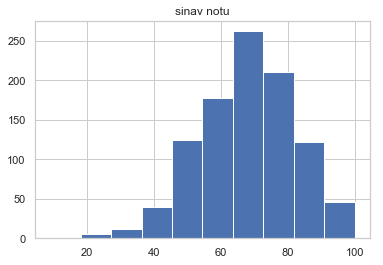

In [61]:
students['sinav_notu']=(students['matematik_notu']+students['okuma_notu']+students['yazma_notu'])/3
plt.hist(sinav_notu)
plt.title('sinav notu')
plt.show()

In [62]:
jb_stats=jarque_bera(sinav_notu)
norm_stats=normaltest(sinav_notu)
print('Jargue bera test istatistigi: {0}, p degeri: {1}'.format(jb_stats[0],jb_stats[1]))
print('Normal test istatistigi: {0}, p degeri {1}'.format(norm_stats[0],norm_stats[1]))

Jargue bera test istatistigi: 15.453387913085164, p degeri: 0.00044089934264401887
Normal test istatistigi: 15.186721327231322, p degeri 0.0005037851534494478


In [78]:
students['norm_sinavnotu']=normalize(np.array(students['sinav_notu']).reshape(1,-1)).reshape(-1,1)
print('Minimum Değer\n-----------------',)
print('Sinav Notu: {}'.format(students['sinav_notu'].min()))
print('Norm Sinav Notu: {}'.format(students['norm_sinavnotu'].min()))
print('\nMaksimum Değer\n-----------------',)
print('Sinav Notu: {}'.format(students['sinav_notu'].max()))
print('Norm Sinav Notu: {}'.format(students['norm_sinavnotu'].max()))

Minimum Değer
-----------------
Sinav Notu: 9.0
Norm Sinav Notu: 0.004109661304911046

Maksimum Değer
-----------------
Sinav Notu: 100.0
Norm Sinav Notu: 0.04566290338790051


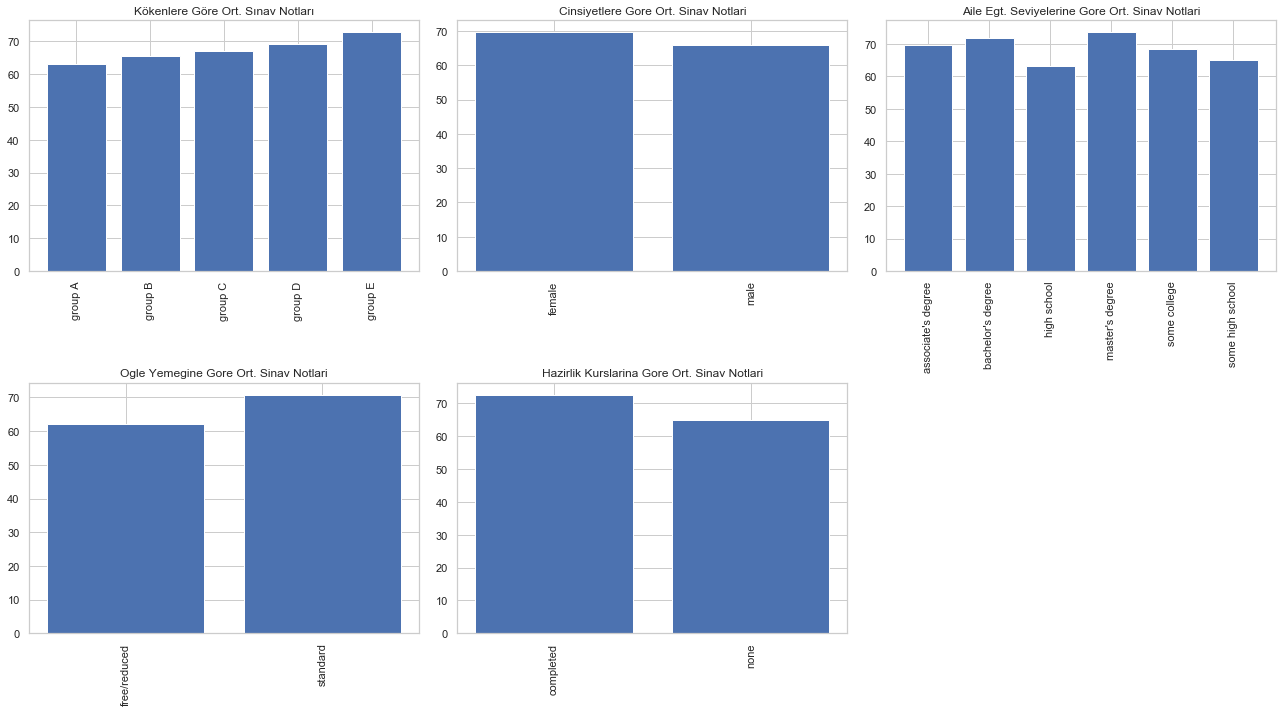

In [84]:
students["sinav_notu"] = sinav_notu

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(students.groupby("koken")
        ["sinav_notu"].mean().index, students.groupby("koken")["sinav_notu"].mean())

plt.title("Kökenlere Göre Ort. Sınav Notları")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(students.groupby("cinsiyet")
        ["sinav_notu"].mean().index, students.groupby("cinsiyet")["sinav_notu"].mean())

plt.title("Cinsiyetlere Gore Ort. Sinav Notlari")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(students.groupby("aile_egt_seviyesi")
        ["sinav_notu"].mean().index, students.groupby("aile_egt_seviyesi")["sinav_notu"].mean())

plt.title("Aile Egt. Seviyelerine Gore Ort. Sinav Notlari")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(students.groupby("ogle_yemegi")
        ["sinav_notu"].mean().index, students.groupby("ogle_yemegi")["sinav_notu"].mean())

plt.title("Ogle Yemegine Gore Ort. Sinav Notlari")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(students.groupby("hazirlik_kursu")
        ["sinav_notu"].mean().index, students.groupby("hazirlik_kursu")["sinav_notu"].mean())

plt.title("Hazirlik Kurslarina Gore Ort. Sinav Notlari")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

Tüm değerler sınavlardaki başarıyı açıklayabilir ancak ögle yemeğı tipi ile sınav notlarını etkileyen başka bir şey var. Dikkat edilmelidir.